In [22]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from  tensorflow.keras.preprocessing.text import one_hot
from  tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Embedding,SimpleRNN, Dense
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.models import Sequential
import numpy as np


In [23]:
max_features = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 [==============================] - 2s 0us/step


In [24]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

x_train shape: (25000,)
y_train shape: (25000,)


In [28]:
## inspecting  sample data
sample = x_train[0]
sample_y= y_train[0]
print("Sample text (encoded):", sample)
print("Sample label:", sample_y)


Sample text (encoded): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Sample label: 1


In [30]:
word_index = imdb.get_word_index()
word_index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [31]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in sample])
print("Decoded review:", decoded_review)

Decoded review: ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have do

In [32]:
maxlen = 500

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [34]:
x_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [71]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

model = Sequential()
model.add(Embedding(max_features, 64, input_length=maxlen))  
model.add(SimpleRNN(
    64,
    activation='relu',
    kernel_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-4)
)) 
model.add(Dropout(0.3))  
  
model.add(Dense(1, activation='sigmoid'))  
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 500, 64)           640000    
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 648321 (2.47 MB)
Trainable params: 648321 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [72]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/10
625/625 [==============================] - 47s 74ms/step - loss: 281.7396 - accuracy: 0.5690 - val_loss: 0.6356 - val_accuracy: 0.6800
Epoch 2/10
625/625 [==============================] - 44s 70ms/step - loss: 0.5284 - accuracy: 0.7864 - val_loss: 0.4699 - val_accuracy: 0.8114
Epoch 3/10
625/625 [==============================] - 39s 63ms/step - loss: 0.3772 - accuracy: 0.8673 - val_loss: 0.4307 - val_accuracy: 0.8216
Epoch 4/10
625/625 [==============================] - 33s 53ms/step - loss: 0.3041 - accuracy: 0.8992 - val_loss: 0.4024 - val_accuracy: 0.8414
Epoch 5/10
625/625 [==============================] - 34s 54ms/step - loss: 0.2566 - accuracy: 0.9226 - val_loss: 0.4200 - val_accuracy: 0.8478
Epoch 6/10
782/782 [==============================] - 9s 12ms/step - loss: 0.4314 - accuracy: 0.8254
Test Loss: 0.4314132332801819
Test Accuracy: 0.825439989566803


In [73]:
model.save('simple_rnn_imdb.h5')

c:\Users\talon\Desktop\Study\Agentic AI\Simple RNN\.venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


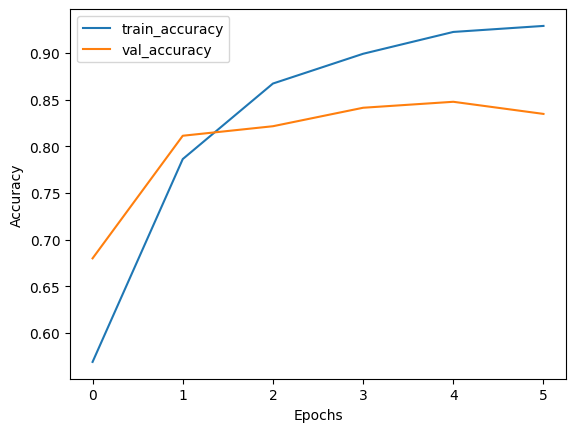

In [74]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [75]:
from tensorflow.keras.models import load_model

model=load_model('simple_rnn_imdb.h5')
model.get_weights()

[array([[-0.02783599,  0.03182631, -0.03314662, ...,  0.01364344,
          0.04341736, -0.01653502],
        [ 0.00915026, -0.01841364, -0.00863104, ...,  0.05111926,
          0.01755592,  0.03906306],
        [-0.01850164,  0.04569001, -0.0402977 , ...,  0.02561114,
          0.0488683 ,  0.05105268],
        ...,
        [ 0.00795357, -0.04370114,  0.01034252, ...,  0.0470592 ,
         -0.0074024 , -0.00533919],
        [-0.05908303,  0.16272815, -0.07184827, ..., -0.15669066,
          0.08562642, -0.10566924],
        [ 0.05669234, -0.21204908,  0.15853353, ...,  0.11310677,
         -0.17344996,  0.19704616]], dtype=float32),
 array([[-0.0127871 , -0.00768104,  0.00136264, ..., -0.09469034,
          0.07563413,  0.02798832],
        [-0.01472397,  0.01202274, -0.00079079, ...,  0.16208698,
          0.1497747 , -0.04556621],
        [-0.02935747,  0.07461265,  0.00121506, ...,  0.10148466,
          0.02210684,  0.01199586],
        ...,
        [-0.0408248 , -0.03663079, -0.0

In [82]:
def decode_review(text):
    word_index = imdb.get_word_index()
    reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
    decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in text])
    return decoded_review

def preprocess_text(text):
    words = text.lower().split()
    encoded_review = [imdb.get_word_index().get(word, 0) + 3 for word in words]
    padded_review = pad_sequences([encoded_review], maxlen=maxlen)
  
    return padded_review
def predict_text(text):
    preprocess_textt = preprocess_text(text)
    prediction = model.predict(preprocess_textt)
    sentiment = 'Positive' if prediction[0][0] > 0.7 else 'Negative'
    return sentiment,prediction[0][0]

In [84]:
exmple_text = "This movie was fantastic! I loved the plot and the acting was superb."
sentiment, confidence = predict_text(exmple_text)
print(f"Sentiment: {sentiment}, Confidence: {confidence:.2f}")

1/1 [==============================] - 0s 29ms/step
Sentiment: Positive, Confidence: 0.82
